In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
finanzas = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/trabajo_practico_1/tarea_del_nene/tarea_del_nene.csv", encoding= "latin-1")
finanzas

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Michaels Cos.,http://www.michaels.com,31000,Retailing,Specialty Retailers: Other,"Irving, TX",8000 Bent Branch Dr.,Irving,TX,...,Chairman & Chief Executive Officer,"8000 Bent Branch Dr., Irving, TX 75063",MIK,"The Michaels Companies, Inc.",5197,5.8,378.2,4.2,2148,-1698.0
496,497,Toll Brothers,http://www.tollbrothers.com,4200,Engineering & Construction,Homebuilders,"Horsham, PA",250 Gibraltar Rd.,Horsham,PA,...,Chief Executive Officer & Director,"250 Gibraltar Rd., Horsham, PA 19044",TOL,"Toll Brothers, Inc.",5170,23.9,382.1,5.2,9737,4229.0
497,498,Yahoo,http://www.yahoo.com,8500,Technology,Internet Services and Retailing,"Sunnyvale, CA",701 First Ave.,Sunnyvale,CA,...,"President, Chief Executive Officer & Director","701 First Ave., Sunnyvale, CA 94089",YHOO,Yahoo! Inc.,5169,4.0,-214.3,5.2,48083,31049.0
498,499,Vistra Energy,http://www.vistraenergy.com,4431,Energy,Energy,"Dallas, TX",1601 Bryan St.,Dallas,TX,...,"President, Chief Executive Officer & Director","1601 Bryan St., Dallas, TX 75201",VST,Vistra Energy Corp.,5164,4.0,-214.3,5.2,15167,6597.0


In [28]:
# Cantidad de variables
print("Cantidad de variables: ", len(finanzas.columns))

Cantidad de variables:  23


In [29]:
# Contar las diferentes tipos de empresas
print("Cantidad de tipos de empresas: ", finanzas["Title"].nunique())

Cantidad de tipos de empresas:  500


In [30]:
finanzas.columns

Index(['Rank', 'Title', 'Website', 'Employees', 'Sector', 'Industry',
       'Hqlocation', 'Hqaddr', 'Hqcity', 'Hqstate', 'Hqzip', 'Hqtel', 'Ceo',
       'Ceo-title', 'Address', 'Ticker', 'Fullname', 'Revenues', 'Revchange',
       'Profits', 'Prftchange', 'Assets', 'Totshequity'],
      dtype='object')

In [31]:
# ¿Cuál fue el cambio porcentual promedio en los beneficios para todas las empresas en el conjunto de datos?
finanzas["Profits"].pct_change().mean()


-1.449465752282422

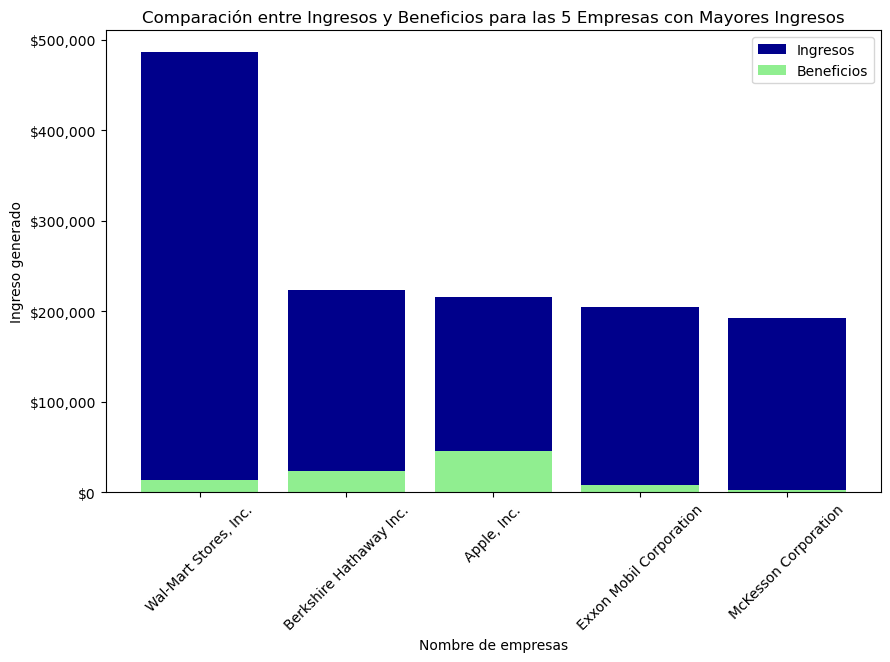

In [32]:
orden_ascendente = finanzas.sort_values(by='Revenues', ascending=False)

# Seleccionar las cinco empresas con mayores ingresos
top_companies = orden_ascendente.head(5)

# Crear un gráfico de barras comparando ingresos y beneficios
plt.figure(figsize=(10, 6))
plt.bar(top_companies['Fullname'], top_companies['Revenues'], label='Ingresos', color='darkblue')
plt.bar(top_companies['Fullname'], top_companies['Profits'], label='Beneficios', color='lightgreen')
plt.ticklabel_format(style='plain', axis='y')  # Evitar notación científica
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
plt.xticks(rotation=45)
plt.xlabel('Nombre de empresas')
plt.ylabel('Ingreso generado')
plt.title('Comparación entre Ingresos y Beneficios para las 5 Empresas con Mayores Ingresos')
plt.legend()
# plt.tight_layout()
plt.show()

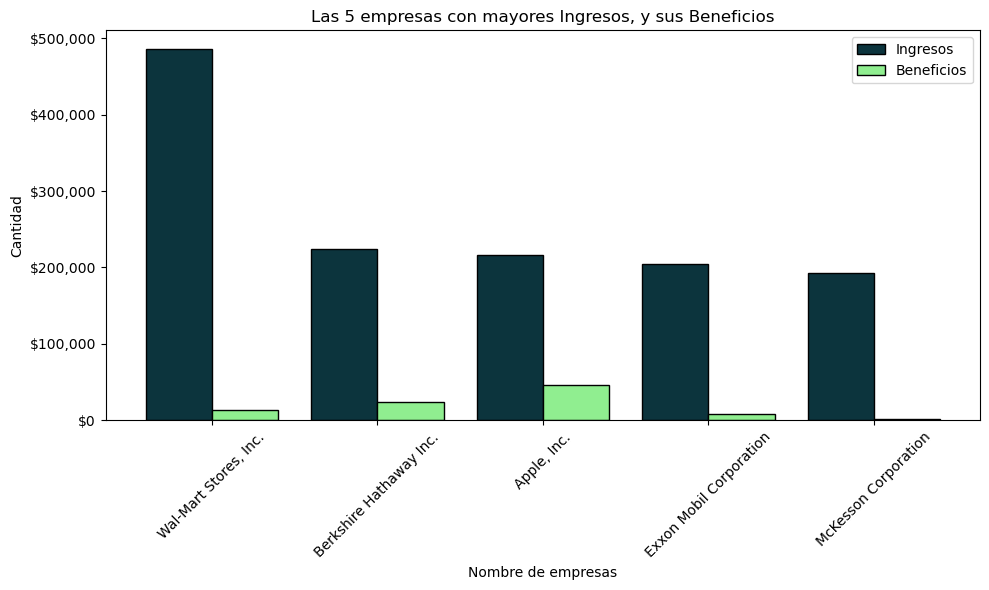

In [33]:
plt.figure(figsize=(10, 6))

# Establecer la posición de las barras
bar_width = 0.4
index = range(len(top_companies))

# Crear las barras de ingresos y beneficios
plt.bar(index, top_companies['Revenues'], bar_width, label='Ingresos', color='#0C343D', edgecolor='black')
plt.bar([i + bar_width for i in index], top_companies['Profits'], bar_width, label='Beneficios', color='lightgreen', edgecolor='black')

# Configurar el formato del eje y
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Configurar las etiquetas y el título del gráfico
plt.xticks([i + bar_width / 2 for i in index], top_companies['Fullname'], rotation=45)
plt.xlabel('Nombre de empresas')
plt.ylabel('Cantidad')
plt.title('Las 5 empresas con mayores Ingresos, y sus Beneficios')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()